In [3]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())

###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth. Partly based on David Ketcheson's pendulum lesson, also under CC-BY.

# Phugoid Oscillation

Welcome back! This is the second IPython Notebook of the series _"The phugoid model of glider flight"_, the first learning module of the course [**"Practical Numerical Methods with Python."**](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about)

In the first notebook, _"Phugoid Motion"_, we described the physics of an aircraft's oscillatory trajectory, seen as an exchange of kinetic and potential energy. This analysis goes back to Frederick Lanchester, who published his book _"Aerodonetics"_ on aircraft stability in 1909. We concluded that first exposure to our problem of interest by plotting the flight paths predicted by Lanchester's analysis, known as _phugoids_.

Here, we will look at the situation when an aircraft is initially moving on the straight-line phugoid (obtained with the parameters $C=2/3$, $\cos\theta=1$, and $z=z_t$ in the previous analysis), and experiences a small upset, a wind gust that slightly perturbs its path. It will then enter into a gentle oscillation around the previous straight-line path: a _phugoid oscillation_.

If the aircraft experiences an upward acceleration of $-d^2z/dt^2$, and we assume that the perturbation is small, then $\cos\theta=1$ is a good approximation and Newton's second law in the vertical direction is:

$$\begin{equation}
L - W = - \frac{W}{g}\frac{d^2 z}{dt^2}
\end{equation}$$

In the previous notebook, we saw that the following relation holds for the ratio of lift to weight, in terms of the trim velocity $v_t$:

$$\begin{equation}
\frac{L}{W}=\frac{v^2}{v_t^2}
\end{equation}$$

This will be useful: we can divide Equation (1) by the weight and use Equation (2) to replace $L/W$. Another useful relation from the previous notebook expressed the conservation of energy (per unit mass) as $v^2 = 2 gz$. With this, Equation (1) is rearranged as:

$$\begin{equation}
\frac{d^2z}{dt^2} + \frac{gz}{z_t} = g
\end{equation}$$

Look at Equation (3) for a moment. Does it ring a bell? Do you recognize it?

If you remember from your physics courses the equation for _simple harmonic motion_, you should see the similarity! 

Take the case of a simple spring. Hooke's law is $F=-kx$, where $F$ is a restoring force, $x$ the displacement from a position of equilibrium and $k$ the spring constant. This results in the following ordinary differential equation for the displacement:

$$\begin{equation}
 \frac{d^2 x}{dt^2}= -\frac{k}{m}x
\end{equation}$$

which has the solution $x(t) = A \cos(\omega t- \phi)$, representing simple harmonic motion with an angular frequency $\omega=\sqrt{k/m}=2\pi f$ and phase angle $\phi$.

Now look back at Equation (3): it has nearly the same form and it represents simple harmonic motion with angular frequency $\omega=\sqrt{g/z_t}$ around mean height $z_t$. 

Think about this for a moment ... we can immediately say what the period of the oscillation is: exactly $2 \pi \sqrt{z_t/g}$ — or, in terms of the trim velocity, $\pi \sqrt{2} v_t/g$.

_This is a remarkable result!_ Think about it: we know nothing about the aircraft, or the flight altitude, yet we can obtain the period of the phugoid oscillation simply as a function of the trim velocity. For example, if trim velocity is 200 knots, we get a phugoid period of about 47 seconds—over that time, you really would not notice anything if you were flying in that aircraft.

Next, we want to be able to compute the trajectory of the aircraft for a given initial perturbance. We will do this by numerically integrating the equation of motion.

## Prepare to integrate

We want to integrate the differential equation and plot the trajectory of the aircraft. Are you ready?

The equation for the phugoid oscillation is a second-order, ordinary differential equation (ODE). Let's represent the time derivative with a prime, and write it like this:

$$\begin{equation}
z(t)'' + \frac{g \,z(t)}{z_t}=g
\end{equation}$$

There's a convenient trick when we work with ODEs: we can turn this 2nd-order equation into a system of two 1st-order equations. Like this:

$$\begin{eqnarray}
z'(t) &=& b(t)\\
b'(t) &=& g\left(1-\frac{z(t)}{z_t}\right)
\end{eqnarray}$$

Are you following? Make sure you are following the derivations, even if it means writing the equations down in your own notes! (Yes, the old-fashioned paper way.)

Another way to look at a system of two 1st-order ODEs is by using vectors. You can make a vector with your two independent variables, 

$$\begin{equation}
\vec{u}  = \begin{pmatrix} z \\ b \end{pmatrix}
\end{equation}$$

and write the differential system as a single vector equation:

\begin{equation}
\vec{u}'(t)  = \begin{pmatrix} b\\ g-g\frac{z(t)}{z_t} \end{pmatrix}
\end{equation}

If you call the right-hand-side $\vec{f}(\vec{u})$, then the equation is very short: $\vec{u}'(t) = \vec{f}(\vec{u})$—but let's drop those arrows to denote vectors from now on, as they are a bit cumbersome: just remember that $u$ and $f$ are vectors in the phugoid equation of motion.

Next, we'll prepare to solve this problem numerically.

## Initial value problems

Let's step back for a moment. Suppose we have a first-order ODE $u'=f(u)$. You know that if we were to integrate this, there would be an arbitrary constant of integration. To find its value, we do need to know one point on the curve $(t, u)$. When the derivative in the ODE is with respect to time, we call that point the _initial value_ and write something like this:

$$u(t=0)=u_0$$

In the case of a second-order ODE, we already saw how to write it as a system of first-order ODEs, and we would need an initial value for each equation: two conditions are needed to determine our constants of integration. The same applies for higher-order ODEs: if it is of order $n$, we can write it as $n$ first-order equations, and we need $n$ known values. If we have that data, we call the problem an _initial value problem_.

Remember the definition of a derivative? The derivative represents the slope of the tangent at a point of the curve $u=u(t)$, and the definition of the derivative $u'$ for a function is:

$$u'(t) = \lim_{\Delta t\rightarrow 0} \frac{u(t+\Delta t)-u(t)}{\Delta t}$$

If the step $\Delta t$ is already very small, we can _approximate_ the derivative by dropping the limit. We can write:

$$\begin{equation}
u(t+\Delta t) \approx u(t) + u'(t) \Delta t
\end{equation}$$

With this equation, and because we know $u'(t)=f(u)$, if we have an initial value, we can step by $\Delta t$ and find the value of $u(t+\Delta t)$, then we can take this value, and find $u(t+2\Delta t)$, and so on: we say that we _step in time_, numerically finding the solution $u(t)$ for a range of values: $t_1, t_2, t_3 \cdots$, each separated by $\Delta t$. The numerical solution of the ODE is simply the table of values $t_i, u_i$ that results from this process.

## Discretization

In order to execute the process described above and find the numerical solution of the ODE, we start by choosing the values $t_1,t_2,t_3 \cdots t_n$—we call these values our *grid* in time. The first point of the grid is given by our _initial value_, and the small difference between two consecutive times is called the _time step_, denoted by $\Delta t$.  The solution value at time $t_n$ is denoted by $u_n$.

Let's build a time grid for our problem. We first choose a final time $T$ and the time step $\Delta t$. In code, we'll use readily identifiable variable names: `T` and `dt`, respectively. With those values set, we can calculate the number of time steps that will be needed to reach the final time; we call that variable `N`. 

Let's write some code. The first thing we do in Python is load our favorite libraries: NumPy for array operations, and the Pyplot module in Matplotlib, to later on be able to plot the numerical solution. The line `%matplotlib inline` tells IPython Notebook to show the plots inline.

In [4]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

Now, initialize `T` and `dt`, calculate `N` and build a NumPy array with all the values of time that make up the grid.

In [5]:
T = 100.0
dt = 0.02
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

We have our grid! Now it's time to apply the numerical time stepping represented by Equation (10).

##### Challenge!

* Write the code above using the NumPy function `arange()` instead of `linspace()`. If you need to, read the documentation for these functions.

In [6]:
t = numpy.arange(0.0, T, dt)

##### Pro tip:

Enter a question mark followed by any function, e.g., `?numpy.linspace`, into a code cell and execute it, to get a help pane on the notebook.

## Euler's method

The approximate solution at time $t_n$ is $u_n$, and the numerical solution of the differential equation consists of computing a sequence of approximate solutions by the following formula, based on Equation (10):

$$u_{n+1} = u_n + \Delta t \,f(u_n).$$

This formula is called **Euler's method**.

For the equations of the phugoid oscillation, Euler's method gives the following algorithm that we need to implement in code:

\begin{align}
z_{n+1} & = z_n + \Delta t \, b_n \\
b_{n+1} & = b_n + \Delta t \left(g - \frac{g}{z_t} \, z_n \right).
\end{align}

### And solve!

To apply the numerical solution method, we need to set things up in code: define the parameter values needed in the model, initialize a NumPy array to hold the discrete solution values, and initialize another array for the elevation values.

In [7]:
# initial conditions
z0 = 100.  #altitude
b0  = 10.  #upward velocity resulting from gust
zt = 100.
g  = 9.81

u = numpy.array([z0, b0])

# initialize an array to hold the changing elevation values
z = numpy.zeros(N)
z[0] = z0  

You should pay attention to a couple of things: (1) See how there is a dot after the numbers used to define our parameters? We just want to be explicit (as a good habit) that these variables are real numbers, called "floats." (2) We both _created_ and _initialized_ with zeros everywhere the solution vector `z`. Look up the documentation for the handy NumPy function `zeros()`, if you need to. (3) In the last line above, we assign the _initial value_ to the first element of the solution vector: `z[0]`.

Now we can step in time using Euler's method. Notice how we are time stepping the two independent variables at once in the time iterations.

In [8]:
# time-loop using Euler's method
for n in range(1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

Make sure you understand what this code is doing. This is a basic pattern in numerical methods: iterations in a time variable that apply a numerical scheme at each step.

## Plot the solution

If the code is correct, we have stored in the array `z` the position of the glider at each time. Let's use Matplotlib to examine the flight path of the aircraft.

You should explore the [Matplotlib tutorial](http://matplotlib.org/users/pyplot_tutorial.html) (if you need to) and familiarize yourself with the command-style functions that control the size, labels, line style, and so on. Creating good plots is a useful skill: it is about communicating your results effectively. 

Here, we set the figure size, the limits of the vertical axis, the format of tick-marks, and axis labels. The final line actually produces the plot, with our chosen line style (continuous black line).

ValueError: x and y must have same first dimension, but have shapes (5000,) and (5001,)

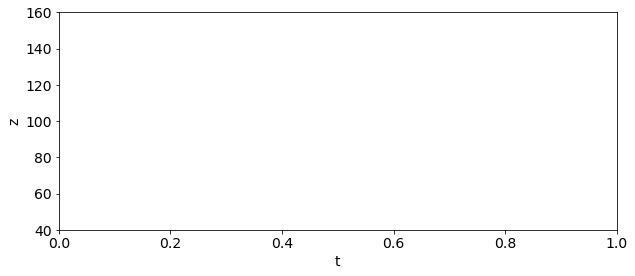

In [9]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z, 'k-');

##### Explore and think

Try changing the value of `v` in the initial conditions.  

* What happens when you have a larger gust?  
* What about a smaller gust?  
* What happens if there isn't a gust (`v = 0`)?

## Exact solution

The equation for phugoid oscillations is a 2nd-order, linear ODE and it has an exact solution of the following form:

$$
\begin{equation}
z(t) = A \sin \left(\sqrt{\frac{g}{z_t}} t \right) + B \cos \left(\sqrt{\frac{g}{z_t}} t \right) + z_t
\end{equation}
$$

where $A$ and $B$ are constants that we solve for using initial conditions.  

Our numerical solution used the initial conditions:

$$\begin{eqnarray}
z(0) = z_0 \\
b(0) = b_0
\end{eqnarray}$$

Applying these to the exact solution and solving for $A$ and $B$, we get:

$$\begin{equation}
z(t) = b_0 \sqrt{\frac{z_t}{g}} \sin \left(\sqrt{\frac{g}{z_t}} t \right) + (z_0-z_t) \cos \left(\sqrt{\frac{g}{z_t}} t \right) + z_t
\end{equation}$$

We already defined all of these variables for our numerical solution, so we can immediately compute the exact solution. 

##### Pro tip:

The expression is a  bit long —if you don't feel like scrolling left and right, you can insert a line break in the code using a backslash '\' _(without any trailing spaces)_ and Python will treat the next line as a continuation of the first.

In [10]:
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
            (z0-zt)*numpy.cos((g/zt)**.5*t)+zt

## Plot the exact solution

Now we can plot our exact solution!  Even better, we can plot _both_ the numerical solution *and* the exact solution to see how well Euler's method approximated the phugoid oscillations.

To add another curve to a plot, simply type a second `pyplot.plot()` statement.  We also added a legend using the format

```Python
pyplot.legend(["line 1","line 2"])
```

ValueError: x and y must have same first dimension, but have shapes (5000,) and (5001,)

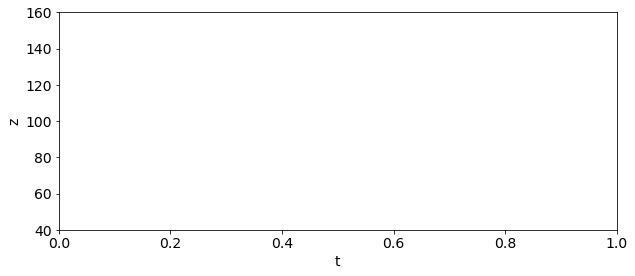

In [11]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z)
pyplot.plot(t, z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution']);

That looks like pretty good agreement, but what's happening towards the end? We'll come back to this. For now, re-run the previous steps with a different timestep, say $dt=0.01$ and pay attention to the difference.

Euler's method, like all numerical methods, introduces some errors.  If the method is *convergent*, the approximation will get closer and closer to the exact solution as we reduce the size of the step, $\Delta t$. The error in the numerical method should tend to zero, in fact, when $\Delta t\rightarrow 0$—when this happens, we call the method _consistent_. We'll define these terms more carefully in the theory components of this course. 

## Convergence

To compare the two solutions, we need to use a **norm** of the difference, like the $L_1$ norm, for example.

$$ E = \Delta t \sum_{n=0}^N \left|z(t_n) - z_n\right|$$

The $L_1$ norm is the sum of the individual differences between the exact and the numerical solutions, at each mesh point. In other words, $E$ is the discrete representation of the integral over the interval $T$ of the (absolute) difference between the computed $z$ and $z_{\rm exact}$:

$$ E = \int \vert z-z_\rm{exact}\vert dt $$

We check for convergence by calculating the numerical solution using progressively smaller values of `dt`. We already have most of the code that we need.  We just need to add an extra loop and an array of different $\Delta t$ values to iterate through.  

You should read the documentation for the function [enumerate](https://docs.python.org/2/library/functions.html#enumerate) and make sure you understand how we're using it below.

##### Warning

The cell below can take a little while to finish (the last $\Delta t$ value alone requires 1 million iterations!).  If the cell is still running, the input label will say `In [*]`.  When it finishes, the `*` will be replaced by a number.

In [17]:
# time-increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1    # number of time-steps
    ### discretize the time using numpy.linspace() ###
    t = numpy.linspace(0.0, T, N)

    # initial conditions
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    # time loop - Euler method
    for n in range(1,N):
        ### compute next solution using Euler method ###
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]   # store the elevation at time-step n+1
    
    z_values[i] = z.copy()    # store the total elevation calculation grid i

### Calculate the error

We now have numerical solutions for each $\Delta t$ in the array `z_values`.  To calculate the error corresponding to each $\Delta t$, we can write a function!  

In [18]:
def get_error(z, dt):
    """Returns the error relative to analytical solution using L-1 norm.
    
    Parameters
    ----------
    z : array of float
        numerical solution.
    dt : float
        time increment.
        
    Returns
    -------
    err : float
        L_{1} norm of the error with respect to the exact solution.
    """
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                (z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    
    return dt * numpy.sum(numpy.abs(z-z_exact))

**Note**: in the last line of the function, we perform an 'array operation': 

`z - z_exact`

We are *not* subtracting one value from another.  Instead, we are taking the difference between elements at each corresponding index in both arrays.  Here is a quick example:

In [19]:
a = numpy.array([1, 2, 3])
b = numpy.array([4, 4, 4])

b - a

array([3, 2, 1])

Now, we iterate through each $\Delta t$ value and calculate the corresponding error.  

In [15]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    error_values[i] = get_error(z_values[i], dt)

Remember, *if* the method is convergent then the error should get smaller as  $\Delta t$ gets smaller.  To visualize this, let's plot $\Delta t$ vs. error.  If you use `pyplot.plot` you won't get a very useful result.  Instead, use `pyplot.loglog` to create the same plot with a log-log scale.  This is what we do almost always to assess the errors of a numerical scheme graphically.

(7.079457843841388e-05,
 0.14125375446227548,
 0.35190900765437,
 848.23498003168095)

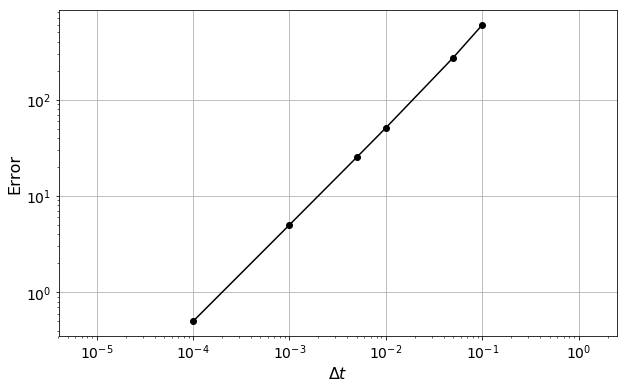

In [16]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')                      #make axes scale equally;

This is the kind of result we like to see!  As $\Delta t$ shrinks (towards the left), the error gets smaller and smaller, like it should.

##### Challenge!

We calculated the error for several different timestep sizes using two nested `for` loops.  That worked, but whenever possible, we like to re-use code (and not just copy and paste it!).  

Create a function that implements Euler's method and re-write the error analysis cell to use your function.

---

###### The cell below loads the style of this notebook.

In [1]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())